# GPS PRN proccessing


In [1]:
%matplotlib inline

## Creation of the signal

In [2]:
from blocksim.graphics.BFigure import FigureFactory
from blocksim.dsp.DSPSignal import DSPSignal
from blocksim.dsp import createGoldSequence

y1 = createGoldSequence(name="s1", sv=[2, 6], repeat=1, chip_rate=1.023e6)
y = createGoldSequence(name="s1", sv=[2, 6], repeat=20, chip_rate=1.023e6)
y = y.applyGaussianNoise(pwr=200)

[INFO] - Registered blocksim.loggers.CSVLogger
[INFO] - Registered blocksim.loggers.PickleLogger
[INFO] - Registered blocksim.loggers.XlsLogger


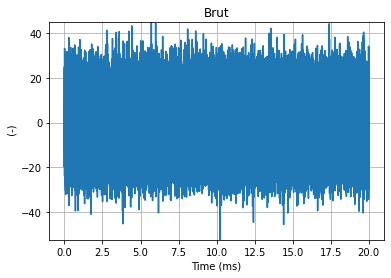

In [3]:
fig = FigureFactory.create()
gs = fig.add_gridspec(1, 1)
axe = fig.add_baxe(title="Brut", spec=gs[0, 0])
axe.plot(y)
mfig = fig.render()

## Processing

### Correlation

In [4]:
# Correlation
z = y.correlate(y1)

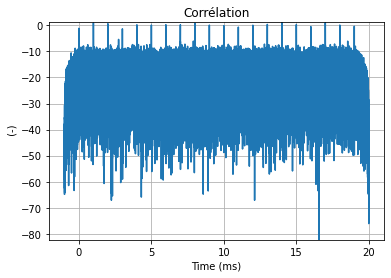

In [5]:
fig = FigureFactory.create()
gs = fig.add_gridspec(1, 1)
axe = fig.add_baxe(title="Corrélation", spec=gs[0, 0])
axe.plot(z)
mfig = fig.render()

### Coherent Integration

In [6]:
# Integration
zi = z.integrate(period=1e-3, offset=511 / (1.023e6))

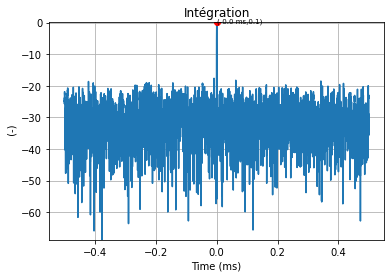

In [7]:
fig = FigureFactory.create()
gs = fig.add_gridspec(1, 1)
axe = fig.add_baxe(title="Intégration", spec=gs[0, 0])
axe.plot(zi, find_peaks=1)
mfig = fig.render()